<a href="https://colab.research.google.com/github/kike22-22/IA/blob/main/Pr%C3%A1ctica_1_Perceptron_multicapa_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Práctica 1 - Perceptron multicapa - Iris

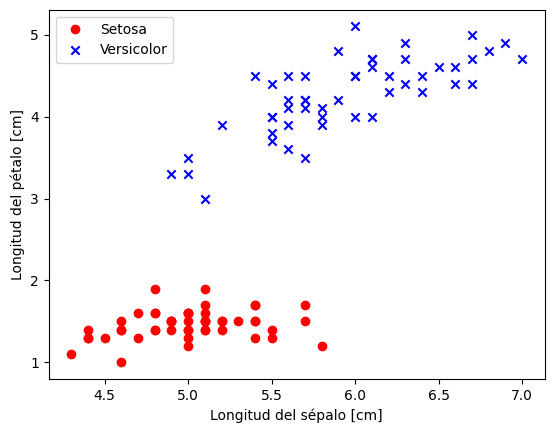

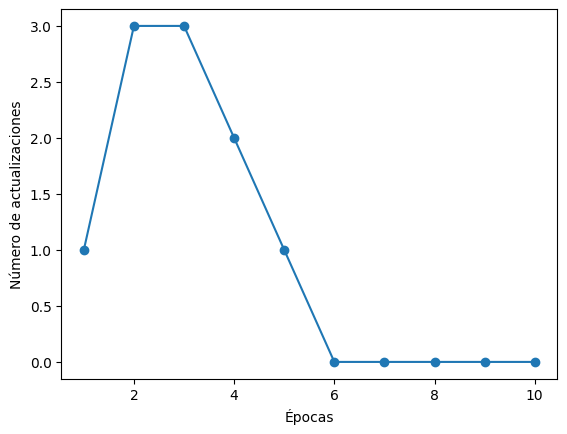

In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clase Perceptrón
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Cargar el conjunto de datos Iris desde la URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Seleccionar características (longitud de sépalo y longitud de pétalo)
X = df.iloc[0:100, [0, 2]].values

# Graficar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

# Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores durante cada época (iteración)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()